In [1]:
import theano
import theano.tensor as tt
import numpy as np
# We don't specify the dtype of our input variables, so it
# defaults to using float64 without any special config.
a = tt.scalar('a')
x = tt.vector('x')
# `tt.ivector` creates a symbolic vector of integers.
y = tt.vector('y')

In [2]:
inner = a * x**3 + y**2
out = tt.exp(inner).sum()

In [3]:
func = theano.function([a, x, y], [out])

In [4]:
a_val = 1.2
x_vals = np.random.randn(10).astype(theano.config.floatX) 
y_vals = np.random.randn(10).astype(theano.config.floatX) 
#x_vals = np.asarray(x_vals,dtype=theano.config.floatX)
#y_vals = np.asarray(y_vals,dtype=theano.config.floatX)
#print(x_vals)
yup = func(a_val, x_vals, y_vals)
yup

[array(273.78191776)]

In [6]:
import theano
import theano.tensor as T
x = T.dmatrix('x')
s = 1 / (1 + T.exp(-x))
logistic = theano.function([x], s)
logistic([[0, 1], [-1, -2]])

array([[0.5       , 0.73105858],
       [0.26894142, 0.11920292]])

In [7]:
np.convolve(out,x_vals,'same')

array([Elemwise{mul,no_inplace}.0, Elemwise{mul,no_inplace}.0,
       Elemwise{mul,no_inplace}.0, Elemwise{mul,no_inplace}.0,
       Elemwise{mul,no_inplace}.0, Elemwise{mul,no_inplace}.0,
       Elemwise{mul,no_inplace}.0, Elemwise{mul,no_inplace}.0,
       Elemwise{mul,no_inplace}.0, Elemwise{mul,no_inplace}.0],
      dtype=object)

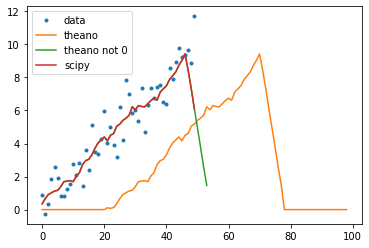

In [64]:
import numpy as np
import theano.tensor as tt
import seaborn as sns
import matplotlib.pyplot as plt
#plt = sns.plt

def conv2D_border_mode_same( x, w ):
    fso = T.shape(w)[2] - 1  # this is the filter size minus 1
    return conv2d(x, w, border_mode='full')[:,:,fso:nps+fso,fso:nps+fso]

x = np.arange(50) * 1.
y = np.random.normal((x+0.1)/5, 1, 50)

def tophat(x, centre, width, amplitude):
    return tt.switch((x < centre + (width/2)) & (x >= centre - (width/2)), np.float64(amplitude) / width,  np.float64(0.))

import theano.tensor.signal.conv
def theano_convolve(x, y, filt_range, centre, width, amplitude):
    a = tt.matrix('a', dtype='float64')
    b = tt.matrix('b', dtype='float64')

    filt = tophat(b, centre, width, amplitude)

    func = tt.signal.conv.conv2d(a, filt, (1, y.shape[0]), (1, filt_range.shape[0]), border_mode='full') / filt.sum()

    return theano.function([a, b], func)(y[None, :], filt_range[None, :])

from scipy.signal import convolve

def scipy_convolve(x, y, filt_range, centre, width, amplitude):
    a = tt.vector('a')
    filt = theano.function([a], tophat(a, centre, width, amplitude))(filt_range)
    return convolve(y, filt, mode='same') / sum(filt)

convolved_theano = theano_convolve(x, y, np.linspace(-10, 10, len(x)), 0, 3, 1)

convolved_scipy = scipy_convolve(x, y, np.linspace(-10, 10, len(x)), 0, 3, 1)

plt.plot(x, y, '.', label='data')
plt.plot(convolved_theano[0]+0.0, label='theano')
plt.plot(convolved_theano[0][convolved_theano[0] > 0.13],label='theano not 0')
plt.plot(convolved_scipy,label='scipy')
plt.legend()
plt.show(block=True)


In [23]:
print(convolved_theano[0].shape)
print(convolved_scipy.shape)

(99,)
(50,)


In [42]:
convolved_theano[0][convolved_theano[0] > 0.1]

array([0.25656241, 0.29637875, 0.13530737, 0.22394689, 0.41678207,
       0.40628591, 0.4188999 , 0.41129617, 0.27255613, 0.48814656,
       0.55679279, 0.51085151, 0.68949677, 1.04075439, 1.35949285,
       1.66090201, 1.93065816, 2.25351136, 2.48447469, 2.81314374,
       2.8846713 , 3.29714279, 3.63525962, 3.99378677, 4.4498585 ,
       4.37967174, 4.86592802, 5.05429311, 5.37376736, 5.36568711,
       5.38339689, 5.60517034, 5.49269052, 5.78380532, 6.22412059,
       6.62362525, 6.83372375, 7.06041755, 7.53894018, 7.53622991,
       7.9290759 , 8.08726408, 8.19533259, 8.2853451 , 8.36296675,
       8.54641999, 8.40169865, 8.79586993, 8.63244438, 8.88577676,
       7.71259849, 6.66334896, 5.61314655, 4.45784681, 3.43686646,
       2.17129942, 1.21070853])

In [52]:
convolved_theano[0][convolved_theano[0] > 0.415].shape

(50,)